The evaluation considers local real estate markets (real estate market for cities) which are chosen.

This kind of evaluation is much more detailed than it would be if based on whole country indicators
because the real estate markets vary from city to city.

The indicators are not described in the below analysis because the are described on the numbeo.com/property-investment.

The set of indicators which are considered are suited to give an answer to the question:
"In which city of the world the investment in real estate is the most profitable?"
from the point of view of that market area inhabitants.

cities list - real estate markets which are going to be compared

name of a city has to be a complement of numbeo.com URL:
https://www.numbeo.com/property-investment/in/ "name of the city"

In [1]:
cities = ['Caracas', 'Algiers', 'Krakow-Cracow', 'Turin', 'Milan', 'London', 'Moscow', 'Oslo', 'Houston', 'Tokyo', 'Kuala-Lumpur']

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

numbeo_scraper function allows accessing data which is provided on the website.

In [4]:
def numbeo_scraper(list_of_cities):
    base_url = 'https://www.numbeo.com/property-investment/in/'
    
    columns = ['Price_to_Income_Ratio', 'Mortgage_as_Percentange_of_Income', 'Loan_Affordability_Index',
 'Price_to_Rent_Ratio__City_Centre', 'Price_to_Rent_Ratio__Outside_of_Centre', 'Gross_Rental_Yield__City_Centre',
 'Gross_Rental_Yield__Outside_of_Centre', 'GDP_Per_Capita__$', 'GDP_Growth_Rate', 'Population_Growth_Rate',
 'City_name']
    
    data = pd.DataFrame(columns=columns)
    
    for city in list_of_cities:
        r = requests.get(base_url + city)
        c = r.content
        soup=BeautifulSoup(c,'html.parser')
        all_data=soup.find_all('table',{'class':'table_indices'})[0:2]
        
        l=[]
        for item in all_data:
            for n in range(16):
                try:
                    i = item.find_all('td')[n].text.replace('\n','')
                    l.append(i) 
                except:
                    None

        l = l[0:14] + l[15:]
        m = [l[i] for i in range(1, len(l), 2)]
        n = [l[j].replace(':', "") for j in range(0, len(l), 2)]
        n = [''.join(i.strip()).replace('-','').replace(' ', '_').replace('(','_').replace(')', '') for i in n]
        n.append('City_name')
        m.append('{}'.format(city))
        d = [{x : y for x,y in zip(n,m)}]
        
        df = pd.DataFrame(d)
            
        data = pd.concat([data, df], sort=True, ignore_index=True)
        
    return data
 

Current values for the cities which were chosen.

In [5]:
numbeo_scraper(cities)

,City_name,GDP_Growth_Rate,GDP_Per_Capita__$,Gross_Rental_Yield__City_Centre,Gross_Rental_Yield__Outside_of_Centre,Loan_Affordability_Index,Mortgage_as_Percentange_of_Income,Population_Growth_Rate,Price_to_Income_Ratio,Price_to_Rent_Ratio__City_Centre,Price_to_Rent_Ratio__Outside_of_Centre
0,Caracas,-14.00%,"15,692.41",6.33%,7.34%,0.03,"3,210.99%",1.24%,144.51,15.80,13.62
1,Algiers,2.00%,"4,055.25",2.69%,3.32%,0.43,234.79%,1.70%,26.04,37.23,30.16
2,Krakow-Cracow,4.60%,"13,863.55",4.32%,4.81%,1.09,91.81%,-0.13%,12.50,23.14,20.78
3,Turin,1.50%,"32,110.03",3.55%,4.50%,1.67,59.76%,0.19%,9.69,28.19,22.22
4,Milan,1.50%,"32,110.03",3.12%,4.60%,0.90,111.61%,0.19%,18.41,32.06,21.73
5,London,1.80%,"39,953.57",2.87%,3.46%,0.66,152.51%,0.52%,22.31,34.89,28.89
6,Moscow,1.50%,"10,743.10",4.03%,4.66%,0.42,237.27%,-0.08%,19.99,24.81,21.45
7,Oslo,1.80%,"75,704.25",3.24%,3.63%,1.32,76.02%,1.01%,11.59,30.91,27.57
8,Houston,2.30%,"59,927.93",13.44%,18.00%,6.19,16.14%,0.81%,2.19,7.44,5.56
9,Tokyo,1.70%,"38,430.29",2.57%,2.78%,1.26,79.65%,-0.21%,13.76,38.85,35.95


In [6]:
#deepcopy

import copy
data = copy.deepcopy(numbeo_scraper(cities))  #DATA

In [7]:
data.head(3)

,City_name,GDP_Growth_Rate,GDP_Per_Capita__$,Gross_Rental_Yield__City_Centre,Gross_Rental_Yield__Outside_of_Centre,Loan_Affordability_Index,Mortgage_as_Percentange_of_Income,Population_Growth_Rate,Price_to_Income_Ratio,Price_to_Rent_Ratio__City_Centre,Price_to_Rent_Ratio__Outside_of_Centre
0,Caracas,-14.00%,"15,692.41",6.33%,7.34%,0.03,"3,210.99%",1.24%,144.51,15.80,13.62
1,Algiers,2.00%,"4,055.25",2.69%,3.32%,0.43,234.79%,1.70%,26.04,37.23,30.16
2,Krakow-Cracow,4.60%,"13,863.55",4.32%,4.81%,1.09,91.81%,-0.13%,12.50,23.14,20.78


Collecting inflation data for given cities

The inflation rate is the same on the area of the same currency therefore we have to access data for a country, not for a city as before.

To do so it is needed to get the name of the country and later the country code, from the cities names provided at the beginning.

In [9]:
cit = data["City_name"]

In [10]:
# attention to timeout error

# CITY TO COUNTRY NAME

from geopy.geocoders import Nominatim


l=[]
for i in cit:
    
    try:
        geolocator = Nominatim(user_agent="city_to_country_name")
        location = geolocator.geocode(i, language="en")
        l.append(location.address)
    except:
        None
print(l)

['Caracas, Municipio Libertador, Capital District, Región Capital, 1010-A, Venezuela', 'Algeria', 'Cracow, 18, Main Square, Old Town, Krakow, Lesser Poland Voivodeship, 31-005, Poland', 'Turin, Torino, Piemont, Italy', 'Milan, Lombardy, Italy', 'London, Greater London, England, SW1A 2DX, United Kingdom', 'Moscow, Central Administrative Okrug, Moscow, Central Federal District, Russia', 'Oslo, 0026, Norway', 'Houston, Harris County, Texas, United States of America', 'Tokyo, Kanto, Japan', 'Kuala Lumpur, Malaysia']


In [11]:
countries_name = [i.split(",")[-1] for i in l]
ll=[]
for i in countries_name:
    if i[0] == " ":
        ll.append(i[1:])
    else:
        ll.append(i)

ll

['Venezuela',
 'Algeria',
 'Poland',
 'Italy',
 'Italy',
 'United Kingdom',
 'Russia',
 'Norway',
 'United States of America',
 'Japan',
 'Malaysia']

In [12]:
if len(l) < len(cit):
    print("Retry CITY TO COUNTRY NAME")

Due to the way of working of "geopy.geocoders" sometimes it is required to retry the callection process uptill receiving the values of all the cities needed.

In [13]:
data["Country_name"] = ll

In [14]:
data.head(3)

,City_name,GDP_Growth_Rate,GDP_Per_Capita__$,Gross_Rental_Yield__City_Centre,Gross_Rental_Yield__Outside_of_Centre,Loan_Affordability_Index,Mortgage_as_Percentange_of_Income,Population_Growth_Rate,Price_to_Income_Ratio,Price_to_Rent_Ratio__City_Centre,Price_to_Rent_Ratio__Outside_of_Centre,Country_name
0,Caracas,-14.00%,"15,692.41",6.33%,7.34%,0.03,"3,210.99%",1.24%,144.51,15.80,13.62,Venezuela
1,Algiers,2.00%,"4,055.25",2.69%,3.32%,0.43,234.79%,1.70%,26.04,37.23,30.16,Algeria
2,Krakow-Cracow,4.60%,"13,863.55",4.32%,4.81%,1.09,91.81%,-0.13%,12.50,23.14,20.78,Poland


It is required to transform the coutry name into country code to receive inflation data from the World Bank API

In [15]:
import pycountry
codes = [pycountry.countries.search_fuzzy(cn)[0].alpha_2 for cn in data["Country_name"]]
codes

['VE', 'DZ', 'PL', 'IT', 'IT', 'GB', 'RU', 'NO', 'US', 'JP', 'MY']

In [16]:
import wbdata
from datetime import datetime as dt

dates = (dt(2010, 1, 1), dt(2018, 12, 30))

indicator = {'FP.CPI.TOTL.ZG':'Inflation, consumer prices (annual %)'}


inf = []
year = 2018
for i in codes:
    df = wbdata.get_dataframe(indicator, country=i, convert_date=False, data_date=dates)  
    value = df["Inflation, consumer prices (annual %)"]["2018"]
    
    while np.isnan(value):
        year = year - 1
        value = df["Inflation, consumer prices (annual %)"]["{}".format(year)]
    
    inf.append(value)

inf

[254.948534781815,
 4.26999020467078,
 1.81295156542681,
 1.13748763600395,
 1.13748763600395,
 2.29283990345939,
 2.87831382614987,
 2.76483134528794,
 2.44258329692818,
 0.979903670486641,
 0.884709160571244]

Updating the dataframe on inflation values.

In [17]:
data["inflation, annual % "] = inf

In [18]:
data.head(3)

,City_name,GDP_Growth_Rate,GDP_Per_Capita__$,Gross_Rental_Yield__City_Centre,Gross_Rental_Yield__Outside_of_Centre,Loan_Affordability_Index,Mortgage_as_Percentange_of_Income,Population_Growth_Rate,Price_to_Income_Ratio,Price_to_Rent_Ratio__City_Centre,Price_to_Rent_Ratio__Outside_of_Centre,Country_name,"inflation, annual %"
0,Caracas,-14.00%,"15,692.41",6.33%,7.34%,0.03,"3,210.99%",1.24%,144.51,15.80,13.62,Venezuela,254.948535
1,Algiers,2.00%,"4,055.25",2.69%,3.32%,0.43,234.79%,1.70%,26.04,37.23,30.16,Algeria,4.269990
2,Krakow-Cracow,4.60%,"13,863.55",4.32%,4.81%,1.09,91.81%,-0.13%,12.50,23.14,20.78,Poland,1.812952


To conduct further standardisation and statistic analysis it is required to convert some of the data into numbers from percentages.

In [19]:
da = pd.DataFrame()
da["City_Name"] = data["City_name"]
da["Country_Name"] = data["Country_name"]
da["GDP_Growth_Rate"] = [float(i.replace("%", "")) * 0.01 for i in data["GDP_Growth_Rate"]]
da["GDP_Per_Capita_$"] = [float(i.replace(",", "")) for i in data["GDP_Per_Capita__$"]]
da["Population_Growth_Rate"] = [float(i.replace("%", "")) * 0.01 for i in data["Population_Growth_Rate"]]
da["Inflation_Annual"] = [float(i) * 0.01 for i in data["inflation, annual % "]]
da["Price_to_Income_Ratio"] = [float(i) for i in data["Price_to_Income_Ratio"]]
da["Mortgage_as_a_Percentage_of_Income"] = [float(i.replace("%", "").replace(",", "")) * 0.01 for i in data["Mortgage_as_Percentange_of_Income"]]
da["Loan_Affordability_Index"] = [float(i) for i in data["Loan_Affordability_Index"]]
da["Price_to_Rent_Ratio_City_Center"] = [float(i) for i in data["Price_to_Rent_Ratio__City_Centre"]]
da["Price_to_Rent_Ratio_Outside_City_Center"] = [float(i) for i in data["Price_to_Rent_Ratio__Outside_of_Centre"]]
da["Gross_Rental_Yield_City_Center"] = [float(i.replace("%", "")) * 0.01 for i in data["Gross_Rental_Yield__City_Centre"]]
da["Gross_Rental_Yield_Outside_City_Center"] = [float(i.replace("%", "")) * 0.01 for i in data["Gross_Rental_Yield__Outside_of_Centre"]]

In [20]:
da

,City_Name,Country_Name,GDP_Growth_Rate,GDP_Per_Capita_$,Population_Growth_Rate,Inflation_Annual,Price_to_Income_Ratio,Mortgage_as_a_Percentage_of_Income,Loan_Affordability_Index,Price_to_Rent_Ratio_City_Center,Price_to_Rent_Ratio_Outside_City_Center,Gross_Rental_Yield_City_Center,Gross_Rental_Yield_Outside_City_Center
0,Caracas,Venezuela,-0.140,15692.41,0.0124,2.549485,144.51,32.1099,0.03,15.80,13.62,0.0633,0.0734
1,Algiers,Algeria,0.020,4055.25,0.0170,0.042700,26.04,2.3479,0.43,37.23,30.16,0.0269,0.0332
2,Krakow-Cracow,Poland,0.046,13863.55,-0.0013,0.018130,12.50,0.9181,1.09,23.14,20.78,0.0432,0.0481
3,Turin,Italy,0.015,32110.03,0.0019,0.011375,9.69,0.5976,1.67,28.19,22.22,0.0355,0.0450
4,Milan,Italy,0.015,32110.03,0.0019,0.011375,18.41,1.1161,0.90,32.06,21.73,0.0312,0.0460
5,London,United Kingdom,0.018,39953.57,0.0052,0.022928,22.31,1.5251,0.66,34.89,28.89,0.0287,0.0346
6,Moscow,Russia,0.015,10743.10,-0.0008,0.028783,19.99,2.3727,0.42,24.81,21.45,0.0403,0.0466
7,Oslo,Norway,0.018,75704.25,0.0101,0.027648,11.59,0.7602,1.32,30.91,27.57,0.0324,0.0363
8,Houston,United States of America,0.023,59927.93,0.0081,0.024426,2.19,0.1614,6.19,7.44,5.56,0.1344,0.1800
9,Tokyo,Japan,0.017,38430.29,-0.0021,0.009799,13.76,0.7965,1.26,38.85,35.95,0.0257,0.0278


In [21]:
import statistics as st

The application of taxonomic method requires the standardisation of the data for which it is needed to get mean and standard deviation of the values.

In [22]:
GDP_Growth_mean_stdv = [st.mean(da["GDP_Growth_Rate"]), st.stdev(da["GDP_Growth_Rate"])]
GDP_Per_Capita_mean_stdv = [st.mean(da["GDP_Per_Capita_$"]), st.stdev(da["GDP_Per_Capita_$"])]
Population_Growth_mean_stdv = [st.mean(da["Population_Growth_Rate"]), st.stdev(da["Population_Growth_Rate"])]
Inflation_mean_stdv = [st.mean(da["Inflation_Annual"]), st.stdev(da["Inflation_Annual"])]
Price_to_Income_mean_stdv = [st.mean(da["Price_to_Income_Ratio"]), st.stdev(da["Price_to_Income_Ratio"])]
Mortgage_mean_stdv = [st.mean(da["Mortgage_as_a_Percentage_of_Income"]), st.stdev(da["Mortgage_as_a_Percentage_of_Income"])]
Loan_Affordability_mean_stdv = [st.mean(da["Loan_Affordability_Index"]), st.stdev(da["Loan_Affordability_Index"])]
Price_to_Rent_CC_mean_stdv = [st.mean(da["Price_to_Rent_Ratio_City_Center"]), st.stdev(da["Price_to_Rent_Ratio_City_Center"])]
Price_to_Rent_OCC_mean_stdv = [st.mean(da["Price_to_Rent_Ratio_Outside_City_Center"]), st.stdev(da["Price_to_Rent_Ratio_Outside_City_Center"])]
Gross_Rental_CC_mean_stdv = [st.mean(da["Gross_Rental_Yield_City_Center"]), st.stdev(da["Gross_Rental_Yield_City_Center"])]
Gross_Rental_OCC_mean_stdv = [st.mean(da["Gross_Rental_Yield_Outside_City_Center"]), st.stdev(da["Gross_Rental_Yield_Outside_City_Center"])]

In [23]:
da.head(3)

,City_Name,Country_Name,GDP_Growth_Rate,GDP_Per_Capita_$,Population_Growth_Rate,Inflation_Annual,Price_to_Income_Ratio,Mortgage_as_a_Percentage_of_Income,Loan_Affordability_Index,Price_to_Rent_Ratio_City_Center,Price_to_Rent_Ratio_Outside_City_Center,Gross_Rental_Yield_City_Center,Gross_Rental_Yield_Outside_City_Center
0,Caracas,Venezuela,-0.140,15692.41,0.0124,2.549485,144.51,32.1099,0.03,15.80,13.62,0.0633,0.0734
1,Algiers,Algeria,0.020,4055.25,0.0170,0.042700,26.04,2.3479,0.43,37.23,30.16,0.0269,0.0332
2,Krakow-Cracow,Poland,0.046,13863.55,-0.0013,0.018130,12.50,0.9181,1.09,23.14,20.78,0.0432,0.0481


Standardisation of the data is executed below, it is conducted by application of the formula:<br>
zij = (xij - mean(xj))/sj<br>
<br>
where:<br>
xij          -    the value of the j'th variable in the i'th unit<br>
mean(xj)     -    the arithmetic mean of the j'th variable<br>
sj           -    standard deviation of the j'th variable<br>
zij          -    a standardised value of the j'th variable in the i'th unit

In [24]:
da_std = pd.DataFrame()
da_std["GDP_Growth_Rate"] = [(i - GDP_Growth_mean_stdv[0])/GDP_Growth_mean_stdv[1] for i in da["GDP_Growth_Rate"]]
da_std["GDP_Per_Capita_$"] = [(i - GDP_Per_Capita_mean_stdv[0])/GDP_Per_Capita_mean_stdv[1] for i in da["GDP_Per_Capita_$"]]
da_std["Population_Growth_Rate"] = [(i - Population_Growth_mean_stdv[0])/Population_Growth_mean_stdv[1] for i in da["Population_Growth_Rate"]]
da_std["Inflation_Annual"] = [(i - Inflation_mean_stdv[0])/Inflation_mean_stdv[1] for i in da["Inflation_Annual"]]
da_std["Price_to_Income_Ratio"] = [(i - Price_to_Income_mean_stdv[0])/Price_to_Income_mean_stdv[1] for i in da["Price_to_Income_Ratio"]]
da_std["Mortgage_as_a_Percentage_of_Income"] = [(i - Mortgage_mean_stdv[0])/Mortgage_mean_stdv[1] for i in da["Mortgage_as_a_Percentage_of_Income"]]
da_std["Loan_Affordability_Index"] = [(i - Loan_Affordability_mean_stdv[0])/Loan_Affordability_mean_stdv[1] for i in da["Loan_Affordability_Index"]]
da_std["Price_to_Rent_CC"] = [(i - Price_to_Rent_CC_mean_stdv[0])/Price_to_Rent_CC_mean_stdv[1] for i in da["Price_to_Rent_Ratio_City_Center"]]
da_std["Price_to_Rent_OCC"] = [(i - Price_to_Rent_OCC_mean_stdv[0])/Price_to_Rent_OCC_mean_stdv[1] for i in da["Price_to_Rent_Ratio_Outside_City_Center"]]
da_std["Gross_Rental_CC"] = [(i - Gross_Rental_CC_mean_stdv[0])/Gross_Rental_CC_mean_stdv[1] for i in da["Gross_Rental_Yield_City_Center"]]
da_std["Gross_Rental_OCC"] = [(i - Gross_Rental_OCC_mean_stdv[0])/Gross_Rental_OCC_mean_stdv[1] for i in da["Gross_Rental_Yield_Outside_City_Center"]]

In [25]:
da_std.head(3)

,GDP_Growth_Rate,GDP_Per_Capita_$,Population_Growth_Rate,Inflation_Annual,Price_to_Income_Ratio,Mortgage_as_a_Percentage_of_Income,Loan_Affordability_Index,Price_to_Rent_CC,Price_to_Rent_OCC,Gross_Rental_CC,Gross_Rental_OCC
0,-2.894990,-0.64543,0.961426,3.014840,2.972716,3.006870,-0.809858,-1.197730,-1.121248,0.563406,0.410281
1,0.200504,-1.16205,1.653434,-0.272504,-0.012438,-0.171952,-0.569739,1.081234,0.890387,-0.601218,-0.527323
2,0.703521,-0.72662,-1.099554,-0.304725,-0.353613,-0.324667,-0.173541,-0.417161,-0.250432,-0.079697,-0.179803


Next part of the prodedure is calculating the so-called taxonomic distance which allows defining the location of each point point in realation to other points. In order to do so, it is required to conduct Euclidean space calculations according to the formula:<br>
<br>
<br>
di0_es = (sum((zij - z0j) ** 2)) ** 1/2<br>
<br>
zij      -         a standardised value of the j'th variable in the i'th unit<br>
z0j      -         the desired value of the nominants<br>
wj       -         value of the indicator importance (weight) (together sum to 1)<br> 
di0_es   -         euclidean distance from i'th object from the desired nominant value


In [26]:
z0j = [max(da_std["GDP_Growth_Rate"]), max(da_std["GDP_Per_Capita_$"]), max(da_std["Population_Growth_Rate"]), min(da["Inflation_Annual"]), max(da_std["Price_to_Income_Ratio"]), min(da_std["Mortgage_as_a_Percentage_of_Income"]), max(da_std["Loan_Affordability_Index"]), min(da_std["Price_to_Rent_CC"]), min(da_std["Price_to_Rent_OCC"]), max(da_std["Gross_Rental_CC"]), max(da_std["Gross_Rental_OCC"])]

In [27]:
weights = [0.6875/11, 0.6875/11, 1.375/11, 1.375/11, 1.375/11, 1.375/11, 1.375/11, 0.6875/11, 0.6875/11, 0.6875/11, 0.6875/11]

In [28]:
d_es = pd.DataFrame()
d_es["GDP_Growth_Rate"] = [((i - z0j[0]) ** 2) * weights[0] for i in da_std["GDP_Growth_Rate"]]
d_es["GDP_Per_Capita"] = [((i - z0j[1]) ** 2) * weights[1] for i in da_std["GDP_Per_Capita_$"]]
d_es["Population_Growth_Rate"] = [((i - z0j[2]) ** 2) * weights[2] for i in da_std["Population_Growth_Rate"]]
d_es["Inflation_Annual"] = [((i - z0j[3]) ** 2) * weights[3] for i in da_std["Inflation_Annual"]]
d_es["Price_to_Income_Ratio"] = [((i - z0j[4]) ** 2) * weights[4] for i in da_std["Price_to_Income_Ratio"]]
d_es["Mortgage_as_a_Percentage_of_Income"] = [((i - z0j[5]) ** 2) * weights[5] for i in da_std["Mortgage_as_a_Percentage_of_Income"]]
d_es["Loan_Affordability_Index"] = [((i - z0j[6]) ** 2) * weights[6] for i in da_std["Loan_Affordability_Index"]]
d_es["Price_to_Rent_CC"] = [((i - z0j[7]) ** 2) * weights[7] for i in da_std["Price_to_Rent_CC"]]
d_es["Price_to_Rent_OCC"] = [((i - z0j[8]) ** 2) * weights[8] for i in da_std["Price_to_Rent_OCC"]]
d_es["Gross_Rental_CC"] = [((i - z0j[9]) ** 2) * weights[9] for i in da_std["Gross_Rental_CC"]]
d_es["Gross_Rental_OCC"] = [((i - z0j[10]) ** 2) * weights[10] for i in da_std["Gross_Rental_OCC"]]

In [29]:
d_es.head(3)

,GDP_Growth_Rate,GDP_Per_Capita,Population_Growth_Rate,Inflation_Annual,Price_to_Income_Ratio,Mortgage_as_a_Percentage_of_Income,Loan_Affordability_Index,Price_to_Rent_CC,Price_to_Rent_OCC,Gross_Rental_CC,Gross_Rental_OCC
0,0.926416,0.443611,0.059859,1.129499,0.000000,1.455524,1.709256,0.049400,0.060059,0.323436,0.386350
1,0.035582,0.632337,0.000000,0.009895,1.113893,0.006817,1.494482,0.627266,0.559471,0.739377,0.732688
2,0.003954,0.471061,0.947368,0.012291,1.383058,0.000817,1.171618,0.174225,0.214159,0.532156,0.591502


In [30]:
d_es["sum"] = d_es.sum(axis=1)
d_es

,GDP_Growth_Rate,GDP_Per_Capita,Population_Growth_Rate,Inflation_Annual,Price_to_Income_Ratio,Mortgage_as_a_Percentage_of_Income,Loan_Affordability_Index,Price_to_Rent_CC,Price_to_Rent_OCC,Gross_Rental_CC,Gross_Rental_OCC,sum
0,0.926416,0.443611,0.059859,1.129499,0.000000,1.455524,1.709256,0.049400,0.060059,0.323436,0.386350,6.543409
1,0.035582,0.632337,0.000000,0.009895,1.113893,0.006817,1.494482,0.627266,0.559471,0.739377,0.732688,5.951808
2,0.003954,0.471061,0.947368,0.012291,1.383058,0.000817,1.171618,0.174225,0.214159,0.532156,0.591502,5.502208
3,0.045290,0.234092,0.645016,0.012995,1.442565,0.000271,0.920285,0.304332,0.256600,0.625809,0.619633,5.106888
4,0.045290,0.234092,0.645016,0.012995,1.261993,0.001300,1.260541,0.428437,0.241728,0.681410,0.610487,5.423289
5,0.039325,0.157434,0.393895,0.011803,1.185139,0.002652,1.377514,0.532593,0.503196,0.714824,0.718779,5.637152
6,0.045290,0.519800,0.896306,0.011220,1.230566,0.006973,1.499675,0.213260,0.233429,0.566537,0.605032,5.828090
7,0.039325,0.000000,0.134684,0.011332,1.402192,0.000511,1.068325,0.389347,0.447865,0.665655,0.702070,4.861306
8,0.030318,0.030658,0.224077,0.011652,1.607529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.904233
9,0.041267,0.171135,1.032008,0.013162,1.356782,0.000575,1.094812,0.697343,0.853825,0.755976,0.787582,6.804468


In [31]:
d_es["di0_es"] = [i ** (1/2) for i in d_es["sum"]]

In [ ]:
d_es["di0_es"]

Obtained results are the basis for determining the synthetic taxonomic measure of the real estate market attractiveness.<br> In order to present results of the application of the model in the numeric range from 0 to 1 and the measure would have higher value if it is more attractive, there is a need of the application of the formula with use of the law of three sigmas:<br>
<br>
di = 1 - di0_es/d0<br>
<br>
where:<br>
di0_es       -     euclidean distance from i'th object from the desired nominant value<br>
d0           -     mean(di0_es) + 3 * standard_deviation(di0_es)<br>
di0          -     i'th di0_es value<br>
di           -     new created real estate market attractiveness measure

In [32]:
di0_es_mean = sum(d_es["di0_es"])/len(d_es["di0_es"])

di0_es_st_dev = st.stdev(d_es["di0_es"])

d0 = di0_es_mean + 3 * di0_es_st_dev

In [33]:
d0

3.2628076658356537

In [34]:
di = [1 - i/d0 for i in d_es["di0_es"]]

In [41]:
results = pd.DataFrame()

results["City"] = da["City_Name"]

results["Valuation"] = di

The table below presents results of the application of the model.

In [46]:
results

,City,Valuation
0,Caracas,0.216010
1,Algiers,0.252290
2,Krakow-Cracow,0.281086
3,Turin,0.307393
4,Milan,0.286260
5,London,0.272323
6,Moscow,0.260102
7,Oslo,0.324252
8,Houston,0.577070
9,Tokyo,0.200524


In [47]:
results.set_index("City", drop = True, inplace=True)

In [48]:
results.sort_values(by = "Valuation")

,Valuation
City,
Tokyo,0.200524
Caracas,0.216010
Algiers,0.252290
Moscow,0.260102
London,0.272323
Krakow-Cracow,0.281086
Milan,0.286260
Turin,0.307393
Oslo,0.324252


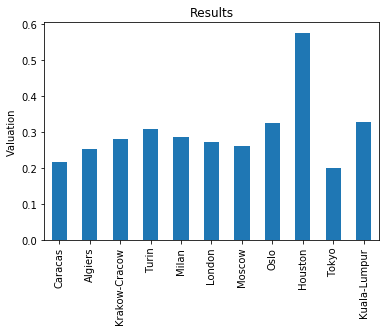

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline 

dfu = results

pp = dfu.plot(kind ="bar") 
plt.legend(loc='best', ) 
plt.title("Results")

plt.xlabel("")
plt.ylabel("Valuation")

pp.get_legend().remove()